<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 데이터 불러오기</a></span></li><li><span><a href="#유저-정보(info_uesr)" data-toc-modified-id="유저-정보(info_uesr)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>유저 정보(info_uesr)</a></span></li><li><span><a href="#로그인-정보(info_login)" data-toc-modified-id="로그인-정보(info_login)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>로그인 정보(info_login)</a></span></li><li><span><a href="#대회-정보(info_compet)" data-toc-modified-id="대회-정보(info_compet)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>대회 정보(info_compet)</a></span></li><li><span><a href="#제출-정보(info_sub)" data-toc-modified-id="제출-정보(info_sub)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>제출 정보(info_sub)</a></span></li><li><span><a href="#데이터-저장" data-toc-modified-id="데이터-저장-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>데이터 저장</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기

In [2]:
# 추가데이터
info_compet = pd.read_csv('data/2차_추가데이터/new_competition_info.csv', encoding='cp949')
info_login = pd.read_csv('data/2차_추가데이터/new_login_info.csv', encoding='cp949', dtype={'platform':np.str, 'browser':np.str})
info_sub = pd.read_csv('data/2차_추가데이터/new_submission_info.csv', encoding='cp949')
info_user = pd.read_csv('data/2차_추가데이터/new_user_info.csv', encoding='cp949')

In [3]:
info_compet.drop('Unnamed: 0', axis=1, inplace=True)
info_login.drop('Unnamed: 0', axis=1, inplace=True)
info_sub.drop('Unnamed: 0', axis=1, inplace=True)
info_user.drop('Unnamed: 0', axis=1, inplace=True)

# 유저 정보(info_uesr)    
- id: 유저 아이디(비식별화)
- c_time: 아이디 생성 시점
- entered_competition_cnt: 대회 참여 횟수
- code_share_cnt: 코드 공유 횟수
- talk_board_cnt: 토론 횟수
- country_code: 국가
- python_level: 파이썬 수준(본인 지정)
- ds_level: 데이터 사이언스 수준(본인 지정)

In [4]:
info_user

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level,sms_auth_date
0,5158.0,2017-05-02 23:58,98.0,321.0,503.0,82.0,1.0,1.0,NaN
1,14446.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0,NaN
2,13978.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0,NaN
3,18499.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0,NaN
4,6467.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
25006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# sms_auth_date 컬럼 삭제
info_user.drop('sms_auth_date', axis=1, inplace=True)
info_user.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,5158.0,2017-05-02 23:58,98.0,321.0,503.0,82.0,1.0,1.0
1,14446.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2,13978.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3,18499.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4,6467.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0


In [6]:
# 결측값 확인
info_user.isnull().sum()

id                         405
c_time                     405
entered_competition_cnt    405
code_share_cnt             405
talk_board_cnt             405
country_code               405
python_level               405
ds_level                   405
dtype: int64

In [7]:
# 모든 행의 값이 결측치인 405개의 data 삭제
info_user.drop(info_user[info_user['id'].isnull()].index, inplace=True)
info_user

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,5158.0,2017-05-02 23:58,98.0,321.0,503.0,82.0,1.0,1.0
1,14446.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2,13978.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3,18499.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4,6467.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
24601,12821.0,2021-01-08 22:33,1.0,0.0,0.0,82.0,1.0,1.0
24602,17895.0,2021-01-08 23:06,1.0,0.0,0.0,82.0,1.0,1.0
24603,21844.0,2021-01-08 23:07,1.0,0.0,0.0,82.0,1.0,1.0
24604,17252.0,2021-01-08 23:13,0.0,0.0,0.0,82.0,1.0,1.0


In [8]:
# 확인
info_user.isnull().sum()

id                         0
c_time                     0
entered_competition_cnt    0
code_share_cnt             0
talk_board_cnt             0
country_code               0
python_level               0
ds_level                   0
dtype: int64

In [9]:
info_user_col = list(info_user.columns)
info_user_col.remove('c_time')
info_user_col

['id',
 'entered_competition_cnt',
 'code_share_cnt',
 'talk_board_cnt',
 'country_code',
 'python_level',
 'ds_level']

In [10]:
# type float->int 변경
for col in info_user_col:
    info_user[col] = info_user[col].astype(int)

In [11]:
info_user.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,5158,2017-05-02 23:58,98,321,503,82,1,1
1,14446,2018-08-08 18:21,1,0,0,82,1,1
2,13978,2018-08-08 19:57,1,0,0,82,1,1
3,18499,2018-08-08 19:59,0,0,0,82,1,1
4,6467,2018-08-08 20:26,0,0,0,82,1,1


In [12]:
info_user.describe()

,id,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
count,24606.000000,24606.000000,24606.000000,24606.000000,24606.000000,24606.000000,24606.000000
mean,12503.319475,1.694302,0.073194,0.092579,81.866374,0.995286,0.994229
std,7221.711663,2.939397,2.571293,3.839246,19.592164,0.077936,0.081935
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6247.250000,0.000000,0.000000,0.000000,82.000000,1.000000,1.000000
50%,12502.500000,1.000000,0.000000,0.000000,82.000000,1.000000,1.000000
75%,18762.750000,2.000000,0.000000,0.000000,82.000000,1.000000,1.000000
max,25010.000000,98.000000,321.000000,503.000000,998.000000,2.000000,2.000000


In [13]:
info_user.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,5158,2017-05-02 23:58,98,321,503,82,1,1
1,14446,2018-08-08 18:21,1,0,0,82,1,1
2,13978,2018-08-08 19:57,1,0,0,82,1,1
3,18499,2018-08-08 19:59,0,0,0,82,1,1
4,6467,2018-08-08 20:26,0,0,0,82,1,1


In [14]:
info_user['entered_competition_cnt'].value_counts().sort_index()

0     8026
1     9024
2     2925
3     1520
4      898
5      681
6      396
7      260
8      193
9      142
10     113
11      84
12      80
13      47
14      39
15      19
16      28
17      12
18      24
19      15
20      15
21      10
22       9
23       6
24       1
25       4
26       2
27       1
28       1
29       3
30       3
31       2
32       5
35       1
37       2
38       2
43       2
45       1
46       1
49       1
51       1
55       2
61       2
71       1
77       1
98       1
Name: entered_competition_cnt, dtype: int64

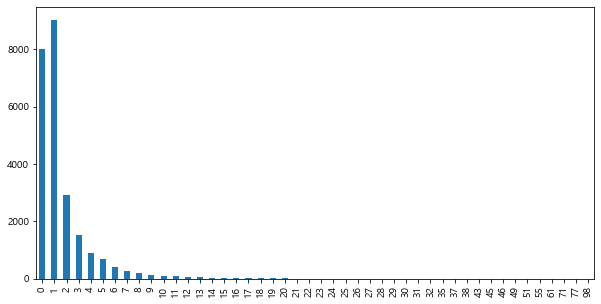

In [15]:
info_user['entered_competition_cnt'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))

- 대회 참여 횟수가 0, 1번인 사용자가 가장 많았으며, 그 다음으로 2,3,4,.. 순으로 높게 나타남
- 대회를 98번 참여한 사용자(id=5158)는 2017년 가입
    - 2018.08부터 2021.01까지 총 50개의 대회가 개최됨
    - 관리자 계정인 것 같음

In [16]:
info_user['code_share_cnt'].value_counts().sort_index()

0      24121
1        276
2         92
3         37
4         24
5         14
6          9
7          6
8          4
9          4
10         2
11         1
12         1
13         1
15         1
16         3
18         2
22         1
29         2
30         1
31         1
69         1
214        1
321        1
Name: code_share_cnt, dtype: int64

In [17]:
info_user['talk_board_cnt'].value_counts().sort_index()

0      23936
1        409
2        133
3         57
4         24
5         15
6          7
7          4
8          3
9          2
10         2
11         2
12         2
13         1
15         1
17         1
26         2
37         1
38         1
109        1
299        1
503        1
Name: talk_board_cnt, dtype: int64

- 코드 공유 횟수, 토론 횟수가 0번인 사용자가 가장 많음
- 이상치로 판단되는 값들은 관리자들 계정으로, 추후 필요시 삭제

In [18]:
info_user['country_code'].value_counts().sort_values(ascending=False)

82     24365
1        121
44        39
7         12
49         8
65         6
81         5
61         4
91         4
41         3
998        3
852        3
86         3
33         3
34         3
976        3
48         3
45         2
31         2
32         2
62         1
593        1
64         1
95         1
370        1
51         1
63         1
886        1
39         1
90         1
971        1
54         1
Name: country_code, dtype: int64

- 한국(82) 유저가 가장 많으며, 그 다음으로 미국(1), 영국(44), 러시아(7), 독일(49) 등의 순으로 높게 나타남

In [19]:
info_user['python_level'].value_counts().sort_index()

0      133
1    24456
2       17
Name: python_level, dtype: int64

In [20]:
info_user['ds_level'].value_counts().sort_index()

0      154
1    24440
2       12
Name: ds_level, dtype: int64

- python

# 로그인 정보(info_login)   
- login_id: 로그인 아이디
- user_id: 유저 아이디(비식별화) --> 결측치는 탈퇴 유저를 의미함
- c_time: 로그인 시점
- platform: 로그인한 플랫폼
- browser: 로그인한 브라우저

In [21]:
info_login

,login_id,user_id,c_time,platform,browser
0,14196.0,14446.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,7287.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,7356.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
3,14278.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
4,14279.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
...,...,...,...,...,...
164116,NaN,NaN,NaN,NaN,NaN
164117,NaN,NaN,NaN,NaN,NaN
164118,NaN,NaN,NaN,NaN,NaN
164119,NaN,NaN,NaN,NaN,NaN


In [22]:
info_login.isnull().sum()

login_id     2713
user_id     10401
c_time       2713
platform    99467
browser     99467
dtype: int64

In [23]:
# 모든 행의 값이 결측치인 것 찾기
idx1 = info_login[(info_login['login_id'].isnull())&(info_login['user_id'].isnull())
           &(info_login['c_time'].isnull())&(info_login['platform'].isnull())&(info_login['browser'].isnull())].index
idx1

Int64Index([161408, 161409, 161410, 161411, 161412, 161413, 161414, 161415,
            161416, 161417,
            ...
            164111, 164112, 164113, 164114, 164115, 164116, 164117, 164118,
            164119, 164120],
           dtype='int64', length=2713)

In [24]:
# 삭제
info_login.drop(idx1, inplace=True)

In [25]:
info_login.isnull().sum()

login_id        0
user_id      7688
c_time          0
platform    96754
browser     96754
dtype: int64

In [26]:
info_login

,login_id,user_id,c_time,platform,browser
0,14196.0,14446.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,7287.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,7356.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
3,14278.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
4,14279.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
...,...,...,...,...,...
161403,596813.0,4417.0,2021-01-08 23:24,NaN,NaN
161404,596814.0,13425.0,2021-01-08 23:26,NaN,NaN
161405,596815.0,16814.0,2021-01-08 23:27,NaN,NaN
161406,596816.0,13134.0,2021-01-08 23:30,NaN,NaN


In [27]:
info_login

,login_id,user_id,c_time,platform,browser
0,14196.0,14446.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,7287.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,7356.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
3,14278.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
4,14279.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
...,...,...,...,...,...
161403,596813.0,4417.0,2021-01-08 23:24,NaN,NaN
161404,596814.0,13425.0,2021-01-08 23:26,NaN,NaN
161405,596815.0,16814.0,2021-01-08 23:27,NaN,NaN
161406,596816.0,13134.0,2021-01-08 23:30,NaN,NaN


In [28]:
info_login['platform'].value_counts()

Windows       43287
Apple          8938
Android        4003
Windows 7      4000
iPhone         2203
Linux          1871
iPad            294
Windows 8        47
unknown           9
Windows XP        2
Name: platform, dtype: int64

In [29]:
info_login['browser'].value_counts()

Chrome 78.0.3904.108             9026
Chrome 71.0.3578.98              5104
Chrome 77.0.3865.90              4318
Chrome 78.0.3904.97              3416
Chrome 75.0.3770.142             2849
                                 ... 
Chrome 81.0.4006.0                  1
Opera 56.0.3051.36                  1
Internet Explorer 11.04.2.4.0       1
Chrome 44.0.2403.119                1
Chrome 75.0.3770.85                 1
Name: browser, Length: 277, dtype: int64

In [30]:
info_login['login_id'].value_counts().sort_values()

567380.0    1
524241.0    1
572739.0    1
524286.0    1
166982.0    1
           ..
524294.0    1
226490.0    1
524288.0    1
524299.0    1
24576.0     1
Name: login_id, Length: 161408, dtype: int64

In [31]:
info_login['date'] = pd.to_datetime(info_login['c_time']).dt.date
info_login['hour'] = pd.to_datetime(info_login['c_time']).dt.hour
info_login.head()

,login_id,user_id,c_time,platform,browser,date,hour
0,14196.0,14446.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0,2018-09-23,1
1,14234.0,7287.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99,2018-09-23,2
2,14256.0,7356.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100,2018-09-23,3
3,14278.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100,2018-09-23,12
4,14279.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100,2018-09-23,12


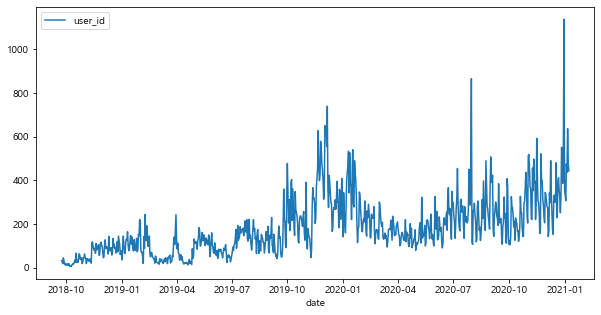

In [32]:
info_login.groupby(['date'])[['user_id']].count().plot(figsize=(10,5))

- 접속수 증가 추세

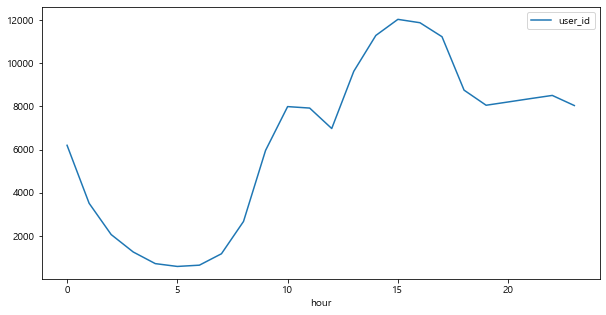

In [33]:
info_login.groupby(['hour'])[['user_id']].count().plot(figsize=(10,5))

- 오후 3시쯤 가장 많은 유저가 사용함

# 대회 정보(info_compet)    
- cpt_id: 대회 아이디
- is_official: Public 대회 여부(1: Public, 0: Private)
- period_start: 대회 시작 시점
- period_end: 대회 종료 시점
- name: 대회 이름(한글)
- name_eng: 대회 이름(영문)
- keyword: 키워드(한글)
- keyword_eng: 키워드(영문)
- participants: 참여자 수
- max_team_member: 최대 팀 멤버
- max_file_per_day: 하루 최대 제출 횟수
- prize: 상금
- prize_info: 상금 정보
- merge_deadline: 팀 병합 데드라인
- winner_show: 보여지는 위너 수

In [34]:
info_compet

,cpt_id,is_official,period_start,period_end,sponsor,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136.0,1.0,2018-08-14 0:00,2018-09-13 23:59,NaN,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,321.0,5.0,5.0,850.0,"$8,500 + 100,000ZPR",2018-09-13 23:59,3.0
1,9565.0,1.0,2018-09-15 0:00,2018-10-13 23:59,NaN,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,482.0,10.0,3.0,350.0,"$3,500 + 40,000ZPR",2018-10-13 23:59,3.0
2,17801.0,1.0,2018-10-18 0:00,2018-12-31 23:59,NaN,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,327.0,10.0,3.0,1000.0,"$10,000 + 120,000ZPR",2018-12-31 23:59,3.0
3,21265.0,1.0,2018-11-13 0:00,2019-01-31 23:59,NaN,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,584.0,10.0,3.0,800.0,"$8,000 + 80,000ZPR",2019-01-31 23:59,3.0
4,42473.0,1.0,2018-12-25 0:00,2019-01-10 23:59,NaN,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",270.0,5.0,3.0,100.0,"$1,000 + 100,000ZPR",2019-01-10 23:59,3.0
5,62540.0,1.0,2019-02-08 0:00,2019-07-18 23:59,NaN,KBO 타자 OPS 예측 경진대회,KBO batter OPS modeling,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",[Sports] KBO hitter big data and AI predict OP...,354.0,5.0,3.0,800.0,800만원,2019-07-18 23:59,3.0
6,68346.0,1.0,2019-03-26 0:00,2019-05-20 23:59,NaN,KBO 외국인 투수 스카우팅 최적화 경진대회,KBO foreign pitcher scouting optimization,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",[Sports] Pitcher Scout Analysis using MLB data...,105.0,1.0,3.0,200.0,200만원,2019-05-20 23:59,3.0
7,82407.0,1.0,2019-05-06 0:00,2019-07-08 23:59,NaN,KCB 금융스타일 시각화 경진대회,KCB Financial Style Visualization Contest,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",Finance | Job offer | Analysis visualization w...,277.0,5.0,3.0,1000.0,"1,000만원",2019-07-08 23:59,3.0
8,140472.0,1.0,2019-07-11 0:00,2019-10-21 23:59,NaN,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",652.0,5.0,100.0,200.0,200만원,2020-10-28 23:59,3.0
9,196878.0,1.0,2019-10-01 0:00,2019-10-27 23:59,NaN,전력 수요량 예측 경진대회,Electric Power Demand Forecast Contest,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",[Public] Analyzing demand by power weather big...,502.0,4.0,3.0,600.0,600만원,2019-10-27 23:59,3.0


In [35]:
info_compet.isnull().sum()

cpt_id               1
is_official          1
period_start         1
period_end           1
sponsor             52
name                 1
name_eng            27
keyword              2
keyword_eng         28
participants         1
max_team_member      1
max_file_per_day     1
prize                1
prize_info          19
merge_deadline       1
winner_show          1
dtype: int64

In [36]:
# sponsor 컬럼 모든 값 결측치 -> 삭제
info_compet.drop('sponsor', axis=1, inplace=True)

In [37]:
# 모든 행이 결측치인 행 삭제
info_compet[info_compet['cpt_id'].isnull()]

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
info_compet.drop(info_compet[info_compet['cpt_id'].isnull()].index, inplace=True)

In [39]:
# 확인
info_compet.isnull().sum()

cpt_id               0
is_official          0
period_start         0
period_end           0
name                 0
name_eng            26
keyword              1
keyword_eng         27
participants         0
max_team_member      0
max_file_per_day     0
prize                0
prize_info          18
merge_deadline       0
winner_show          0
dtype: int64

In [40]:
info_compet['name']

0                  대출 상점 총 매출 예측 경진대회
1                  병원 개/폐업 분류 예측 경진대회
2                    아파트 경매가격 예측 경진대회
3                         아파트 실거래가 예측
4                     신용카드 거래 데이터 시각화
5                  KBO 타자 OPS 예측 경진대회
6            KBO 외국인 투수 스카우팅 최적화 경진대회
7                  KCB 금융스타일 시각화 경진대회
8                  상점 신용카드 매출 예측 경진대회
9                      전력 수요량 예측 경진대회
10                퇴근시간 버스승차인원 예측 경진대회
11                    버스 운행시간 예측 경진대회
12                      금융 문자 분석 경진대회
13                  위성 이미지 객체 검출 경진대회
14                KBO 타자 OPS 시각화 경진대회
15                  원자력발전소 상태 판단 경진대회
16                  반도체 박막 두께 분석 경진대회
17                        천체 유형 분류 대회
18             행동 데이터 분석 인공지능 AI 경진대회
19            공공 데이터 활용 온도 추정 AI 경진대회
20                    랜드마크 분류 AI 경진대회
21                코로나 데이터 시각화 AI 경진대회
22        위성관측 데이터 활용 강수량 산출 AI 경진대회 
23    공공 데이터 활용 전력수요 및 SMP 예측 AI 경진대회
24               생체 광학 데이터 분석 AI 경진대회
25            블럭 장난감 제조 공정 최적화 AI경진대회
26          

In [41]:
info_compet.loc[47,'name']

'데이콘 대회 테스트용 '

In [42]:
# name == '데이콘 대회 테스트용' 삭제
info_compet.drop(47, inplace=True)

In [43]:
info_compet['name']

0                  대출 상점 총 매출 예측 경진대회
1                  병원 개/폐업 분류 예측 경진대회
2                    아파트 경매가격 예측 경진대회
3                         아파트 실거래가 예측
4                     신용카드 거래 데이터 시각화
5                  KBO 타자 OPS 예측 경진대회
6            KBO 외국인 투수 스카우팅 최적화 경진대회
7                  KCB 금융스타일 시각화 경진대회
8                  상점 신용카드 매출 예측 경진대회
9                      전력 수요량 예측 경진대회
10                퇴근시간 버스승차인원 예측 경진대회
11                    버스 운행시간 예측 경진대회
12                      금융 문자 분석 경진대회
13                  위성 이미지 객체 검출 경진대회
14                KBO 타자 OPS 시각화 경진대회
15                  원자력발전소 상태 판단 경진대회
16                  반도체 박막 두께 분석 경진대회
17                        천체 유형 분류 대회
18             행동 데이터 분석 인공지능 AI 경진대회
19            공공 데이터 활용 온도 추정 AI 경진대회
20                    랜드마크 분류 AI 경진대회
21                코로나 데이터 시각화 AI 경진대회
22        위성관측 데이터 활용 강수량 산출 AI 경진대회 
23    공공 데이터 활용 전력수요 및 SMP 예측 AI 경진대회
24               생체 광학 데이터 분석 AI 경진대회
25            블럭 장난감 제조 공정 최적화 AI경진대회
26          

In [44]:
# index reset
info_compet.reset_index(inplace=True)
info_compet.drop('index', axis=1, inplace=True)
info_compet

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136.0,1.0,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,321.0,5.0,5.0,850.0,"$8,500 + 100,000ZPR",2018-09-13 23:59,3.0
1,9565.0,1.0,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,482.0,10.0,3.0,350.0,"$3,500 + 40,000ZPR",2018-10-13 23:59,3.0
2,17801.0,1.0,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,327.0,10.0,3.0,1000.0,"$10,000 + 120,000ZPR",2018-12-31 23:59,3.0
3,21265.0,1.0,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,584.0,10.0,3.0,800.0,"$8,000 + 80,000ZPR",2019-01-31 23:59,3.0
4,42473.0,1.0,2018-12-25 0:00,2019-01-10 23:59,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",270.0,5.0,3.0,100.0,"$1,000 + 100,000ZPR",2019-01-10 23:59,3.0
5,62540.0,1.0,2019-02-08 0:00,2019-07-18 23:59,KBO 타자 OPS 예측 경진대회,KBO batter OPS modeling,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",[Sports] KBO hitter big data and AI predict OP...,354.0,5.0,3.0,800.0,800만원,2019-07-18 23:59,3.0
6,68346.0,1.0,2019-03-26 0:00,2019-05-20 23:59,KBO 외국인 투수 스카우팅 최적화 경진대회,KBO foreign pitcher scouting optimization,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",[Sports] Pitcher Scout Analysis using MLB data...,105.0,1.0,3.0,200.0,200만원,2019-05-20 23:59,3.0
7,82407.0,1.0,2019-05-06 0:00,2019-07-08 23:59,KCB 금융스타일 시각화 경진대회,KCB Financial Style Visualization Contest,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",Finance | Job offer | Analysis visualization w...,277.0,5.0,3.0,1000.0,"1,000만원",2019-07-08 23:59,3.0
8,140472.0,1.0,2019-07-11 0:00,2019-10-21 23:59,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",652.0,5.0,100.0,200.0,200만원,2020-10-28 23:59,3.0
9,196878.0,1.0,2019-10-01 0:00,2019-10-27 23:59,전력 수요량 예측 경진대회,Electric Power Demand Forecast Contest,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",[Public] Analyzing demand by power weather big...,502.0,4.0,3.0,600.0,600만원,2019-10-27 23:59,3.0


In [45]:
# data type float -> int
info_compet['participants'] = info_compet['participants'].astype(int)
info_compet['max_team_member'] = info_compet['max_team_member'].astype(int)
info_compet['max_file_per_day'] = info_compet['max_file_per_day'].astype(int)
info_compet['prize'] = info_compet['prize'].astype(int)
info_compet['winner_show'] = info_compet['winner_show'].astype(int)

In [46]:
info_compet.describe()

,cpt_id,is_official,participants,max_team_member,max_file_per_day,prize,winner_show
count,50.000000,50.0,50.000000,50.000000,50.00000,50.000000,50.000000
mean,201085.560000,1.0,678.980000,4.920000,7.30000,761.000000,4.080000
std,74184.474902,0.0,422.627664,1.957091,13.83614,847.833542,2.617367
min,136.000000,1.0,87.000000,1.000000,3.00000,0.000000,0.000000
25%,235423.750000,1.0,400.750000,4.000000,3.00000,200.000000,3.000000
50%,235610.000000,1.0,523.000000,5.000000,3.00000,600.000000,3.000000
75%,235653.000000,1.0,918.750000,5.000000,10.00000,1000.000000,3.000000
max,235687.000000,1.0,2017.000000,10.000000,100.00000,4850.000000,11.000000


In [47]:
# 필요없는 컬럼 삭제
# is_official: 값이 모두 1임, prize_info
info_compet.drop(['is_official','prize_info'], axis=1, inplace=True)
info_compet.head(2)

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
0,136.0,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,321,5,5,850,2018-09-13 23:59,3
1,9565.0,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,482,10,3,350,2018-10-13 23:59,3


In [48]:
info_compet['participants'].value_counts().sort_index()

87      1
105     1
184     1
263     1
270     1
277     1
321     1
327     1
331     1
354     2
381     1
398     1
409     1
412     1
419     1
420     1
424     1
431     1
445     1
462     1
473     1
482     1
498     1
502     1
544     1
574     1
584     1
652     1
665     1
668     1
707     1
781     1
802     1
866     1
903     1
918     1
919     1
923     1
944     1
966     1
970     1
1149    1
1197    1
1207    1
1298    1
1318    1
1555    1
1793    1
2017    1
Name: participants, dtype: int64

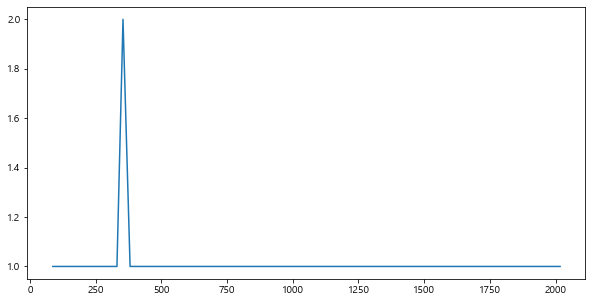

In [49]:
info_compet['participants'].value_counts().sort_index().plot(figsize=(10,5))

In [50]:
info_compet.sort_values(by='participants', ascending=False)

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
29,235618.0,2020-07-01 10:00,2020-07-31 18:00,포스트 코로나 데이터 시각화 경진대회,NaN,KT | 유동인구 | 소비 | 포스트 코로나 | 투표 및 심사 평가,NaN,2017,5,15,600,2020-07-20 23:59,10
21,235590.0,2020-03-29 0:00,2020-05-10 17:59,코로나 데이터 시각화 AI 경진대회,Corona Data Visualization Contest,월간 데이콘 4 | 의료 | 마이크로소프트 | 코로나 빅데이터를 AI로 시각화 |...,Monthly Daycon 4 | Medical | Visualize Corona ...,1793,5,10,250,2020-05-03 23:59,10
27,235615.0,2020-06-22 10:00,2020-07-31 17:59,제주 신용카드 빅데이터 경진대회,NaN,금융 | 제주테크노파크 | 공공데이터 AI 활용 카드 사용량 예측 | RMSLE,NaN,1555,5,3,600,2020-07-17 23:59,3
46,235680.0,2020-12-09 12:00,2021-01-26 17:59,태양광 발전량 예측 AI 경진대회,NaN,태양광 발전량 | 시계열ㅣPinball Loss,NaN,1318,4,3,600,2021-01-11 23:59,3
36,235647.0,2020-09-28 0:00,2020-11-16 17:59,심리 성향 예측 AI 경진대회,NaN,월간 데이콘 8 | 심리 테스트 분석 | AUC | 분류,NaN,1298,3,3,100,2020-11-02 23:59,11
49,235687.0,2021-01-06 10:00,2021-02-03 18:00,시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회,NaN,LG | 채용 | 시스템 | 사용자 불편 | 정형 | AUC,NaN,1207,5,3,1000,2021-01-24 23:59,3
19,235584.0,2020-03-01 0:00,2020-04-13 17:59,공공 데이터 활용 온도 추정 AI 경진대회,Public data utilization temperature estimation...,AI프렌즈 시즌1 | 기상 | 한국기계연구원 | 지역별 Small 공공 데이터와 ...,AI Friends Season 1 | Weather | Creating 'My M...,1197,5,10,250,2020-03-29 23:59,3
15,235551.0,2020-01-16 0:00,2020-02-12 23:59,원자력발전소 상태 판단 경진대회,Nuclear Power Plant Status Contest Competition,"산업 | 한국수력원자력 | 발전소 빅데이터, AI 활용 발전소 상태 분류 | Log...",Industry | Nuclear power plants sort thousands...,1149,5,3,1000,2020-02-12 23:59,5
32,235626.0,2020-08-03 10:00,2020-09-14 17:59,컴퓨터 비전 학습 경진대회,NaN,월간 데이콘 7 | 글자에 숨겨진 숫자 이미지 예측 | MNIST | Accura...,NaN,970,3,3,100,2020-08-31 23:59,10
30,235622.0,2020-07-14 10:00,2020-09-04 18:00,국토교통 빅데이터 온라인 해커톤 경진대회,NaN,국토교통부 | 빅데이터 | 포스트코로나 | 시각화 | 투표 및 심사평가,NaN,966,5,10,1100,2020-09-04 23:59,5


- 코로나 시각화 대회 2개 모두 참가자 수가 가장 많음

In [51]:
info_compet['max_team_member'].value_counts().sort_index()

1      1
3     11
4      3
5     30
10     5
Name: max_team_member, dtype: int64

- 최대 팀 멤버수는 5명이 가장 많음

In [52]:
info_compet[info_compet['max_team_member'] == 10]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
1,9565.0,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,482,10,3,350,2018-10-13 23:59,3
2,17801.0,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,327,10,3,1000,2018-12-31 23:59,3
3,21265.0,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,584,10,3,800,2019-01-31 23:59,3
41,235670.0,2020-10-29 0:00,2020-12-04 17:59,소설 작가 분류 AI 경진대회,NaN,월간 데이콘 9 | 소설 문체 | NLP | Logloss,NaN,707,10,3,100,2020-11-27 23:59,11
47,235682.0,2020-12-14 10:00,2020-12-27 17:59,공간정보 탐색적 데이터 분석 경진대회,NaN,국토도시 빅데이터 윈터스쿨 | 국토연구원 | 시각화 | 유저평가,NaN,409,10,10,100,2020-12-23 23:59,3


In [53]:
info_compet['max_file_per_day'].value_counts().sort_index()

3      30
5       5
10     12
15      2
100     1
Name: max_file_per_day, dtype: int64

In [54]:
# 하루 최대 제출 횟수가 100번?
info_compet[info_compet['max_file_per_day'] == 100]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
8,140472.0,2019-07-11 0:00,2019-10-21 23:59,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",652,5,100,200,2020-10-28 23:59,3


- 최대 제출 횟수 15번으로 변경 필요   
- merge_deadline?
    - 대회 종료일보다 팀병합 마감일이 약 1년 정도 뒤의 날짜임
        - 공식적인 대회는 종료되었지만, 2019.10.06부터 28일 간격으로 상위 랭크자 재평가 및 취업 의향 물어본다고 함
    - 이런 경우가 더 있는지 살펴보고, 해당 대회 팀 병합 마감일 값 삭제 필요!

In [55]:
# 최대 제출 횟수 15번으로 변경
info_compet.loc[info_compet['max_file_per_day'] == 100, 'max_file_per_day'] = 15
info_compet.iloc[8,:]

cpt_id                                                         140472
period_start                                          2019-07-11 0:00
period_end                                           2019-10-21 23:59
name                                               상점 신용카드 매출 예측 경진대회
name_eng                     Store Credit Card Sales Forecast Contest
keyword             금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...
keyword_eng         [Finance, Job Offers] Small business merchant ...
participants                                                      652
max_team_member                                                     5
max_file_per_day                                                   15
prize                                                             200
merge_deadline                                       2020-10-28 23:59
winner_show                                                         3
Name: 8, dtype: object

In [56]:
# period_end < mergedeadline 인 대회 찾기
info_compet[info_compet['period_end'] < info_compet['merge_deadline']]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
8,140472.0,2019-07-11 0:00,2019-10-21 23:59,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",652,5,15,200,2020-10-28 23:59,3
10,229255.0,2019-11-11 0:00,2019-12-06 23:59,퇴근시간 버스승차인원 예측 경진대회,Bus Time Estimated Contest,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,Transportation | Bus transportation use analys...,923,5,10,700,2020-07-18 23:59,3
30,235622.0,2020-07-14 10:00,2020-09-04 18:00,국토교통 빅데이터 온라인 해커톤 경진대회,NaN,국토교통부 | 빅데이터 | 포스트코로나 | 시각화 | 투표 및 심사평가,NaN,966,5,10,1100,2020-09-04 23:59,5
35,235646.0,2020-10-05 10:00,2020-11-13 17:59,공공데이터 활용 수력 댐 강우예측 AI 경진대회,NaN,한국수력원자력 | 강우예측 | MAE/CSI,NaN,462,5,3,1100,2020-11-13 23:59,3
39,235663.0,2020-11-23 0:00,2020-12-31 17:59,Y&Z세대 투자자 프로파일링 시각화 경진대회,NaN,"금융 | NH투자증권 | 시각화 | 투표 및 심사평가 | 중복참가 불가, 대학 재학...",NaN,473,3,10,2500,2020-12-31 23:59,3


- 대회 종료일과 팀 병합 마감일이 같은 날인 대회 3개를 제외한, cpt_id == 140472,229255의 팀병합일 결측치 처리 필요
    - 해당 2개 대회의 팀 병합 마감일이 target 값에 미치는 영향이 미미할 것 이라 판단됨

In [57]:
info_compet.loc[info_compet['cpt_id'] == 140472, 'merge_deadline'] = np.nan
info_compet.loc[info_compet['cpt_id'] == 229255, 'merge_deadline'] = np.nan

In [58]:
info_compet[info_compet['merge_deadline'].isnull()]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
8,140472.0,2019-07-11 0:00,2019-10-21 23:59,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",652,5,15,200,NaN,3
10,229255.0,2019-11-11 0:00,2019-12-06 23:59,퇴근시간 버스승차인원 예측 경진대회,Bus Time Estimated Contest,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,Transportation | Bus transportation use analys...,923,5,10,700,NaN,3


In [59]:
info_compet['prize'].value_counts().sort_index()

0        1
83       1
100      8
103      1
154      1
200      3
250      4
300      1
350      1
360      1
600      6
700      1
800      2
850      1
1000    10
1100     2
1500     1
2000     2
2500     2
4850     1
Name: prize, dtype: int64

In [60]:
info_compet['winner_show'].value_counts().sort_index()

0      1
3     39
5      3
10     5
11     2
Name: winner_show, dtype: int64

In [61]:
info_compet[info_compet['winner_show'] == 0]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
40,235668.0,2020-10-29 0:00,2020-11-13 23:59,꿈꾸는아이(AI) 전력 수요량 예측 경진대회,NaN,전력 수요량 | 시계열 | SMAPE,NaN,87,4,3,4850,2020-11-13 23:59,0


In [62]:
# 홈페이지 확인 결과 winner_show 1명임 => 수정
info_compet.loc[info_compet['winner_show'] == 0, 'winner_show'] = 1

In [63]:
info_compet[info_compet['winner_show'] == 1]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
40,235668.0,2020-10-29 0:00,2020-11-13 23:59,꿈꾸는아이(AI) 전력 수요량 예측 경진대회,NaN,전력 수요량 | 시계열 | SMAPE,NaN,87,4,3,4850,2020-11-13 23:59,1


In [64]:
info_compet['period_start'] = pd.to_datetime(info_compet['period_start']).dt.date
info_compet['period_end'] = pd.to_datetime(info_compet['period_end']).dt.date
info_compet['merge_deadline'] = pd.to_datetime(info_compet['merge_deadline']).dt.date

In [65]:
# 참여자 수가 많은 대회
tmp = info_compet[['name','participants']].copy()
tmp.sort_values(by='participants', ascending=False).style.bar() 

,name,participants
29,포스트 코로나 데이터 시각화 경진대회,2017
21,코로나 데이터 시각화 AI 경진대회,1793
27,제주 신용카드 빅데이터 경진대회,1555
46,태양광 발전량 예측 AI 경진대회,1318
36,심리 성향 예측 AI 경진대회,1298
49,시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회,1207
19,공공 데이터 활용 온도 추정 AI 경진대회,1197
15,원자력발전소 상태 판단 경진대회,1149
32,컴퓨터 비전 학습 경진대회,970
30,국토교통 빅데이터 온라인 해커톤 경진대회,966


- '코로나','시각화' 단어가 들어간 대회가 1,2위를 차지함

In [66]:
# 상금이 많은 대회
tmp = info_compet[['name','prize']].copy()
tmp.sort_values(by='prize', ascending=False).style.bar() 

,name,prize
40,꿈꾸는아이(AI) 전력 수요량 예측 경진대회,4850
38,"AI야 , 진짜 뉴스를 찾아줘! AI 경진대회",2500
39,Y&Z세대 투자자 프로파일링 시각화 경진대회,2500
31,산업제어시스템 보안위협 탐지 AI 경진대회,2000
12,금융 문자 분석 경진대회,2000
20,랜드마크 분류 AI 경진대회,1500
35,공공데이터 활용 수력 댐 강우예측 AI 경진대회,1100
30,국토교통 빅데이터 온라인 해커톤 경진대회,1100
7,KCB 금융스타일 시각화 경진대회,1000
42,한국어 문서 추출요약 AI 경진대회,1000


In [67]:
# 상금이 많은 대회
tmp = info_compet[['name','prize', 'participants']].copy()
tmp.sort_values(by='prize', ascending=False).style.bar() 

,name,prize,participants
40,꿈꾸는아이(AI) 전력 수요량 예측 경진대회,4850,87
38,"AI야 , 진짜 뉴스를 찾아줘! AI 경진대회",2500,544
39,Y&Z세대 투자자 프로파일링 시각화 경진대회,2500,473
31,산업제어시스템 보안위협 탐지 AI 경진대회,2000,919
12,금융 문자 분석 경진대회,2000,944
20,랜드마크 분류 AI 경진대회,1500,398
35,공공데이터 활용 수력 댐 강우예측 AI 경진대회,1100,462
30,국토교통 빅데이터 온라인 해커톤 경진대회,1100,966
7,KCB 금융스타일 시각화 경진대회,1000,277
42,한국어 문서 추출요약 AI 경진대회,1000,419


- (상금이 높으면 참여자 수가 많을 것이라는 예상과 달리) prize와 participants간의 약한 음의 상관관계가 있음
- 상금이 높으면, 난이도가 올라가기 때문에 쉽게 참여하지 못하는 것 같다

# 제출 정보(info_sub)
- sub_id: 제출 아이디
- cpt_id: 제출 대회 아이디
- team_id: 팀 아이디(비식별화)
- user_id: 유저 아이디(비식별화)
- c_time: 제출 시점

In [68]:
info_sub

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,23529.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,16668.0,2019-11-24 20:36
2,-250881.0,235401.0,5042.0,7048.0,2019-11-24 20:24
3,-250873.0,235401.0,5024.0,6540.0,2019-11-24 20:23
4,-250860.0,229255.0,4890.0,4364.0,2019-11-24 20:19
...,...,...,...,...,...
113630,NaN,NaN,NaN,NaN,NaN
113631,NaN,NaN,NaN,NaN,NaN
113632,NaN,NaN,NaN,NaN,NaN
113633,NaN,NaN,NaN,NaN,NaN


In [69]:
info_sub.isnull().sum()

sub_id     3363
cpt_id     3363
team_id    3449
user_id    5839
c_time     3363
dtype: int64

In [70]:
# 모든 행이 결측치인 것 찾기
idx2 = info_sub[(info_sub['sub_id'].isnull())&(info_sub['cpt_id'].isnull())&(info_sub['team_id'].isnull())
                &(info_sub['user_id'].isnull())&(info_sub['c_time'].isnull())].index
idx2

Int64Index([110272, 110273, 110274, 110275, 110276, 110277, 110278, 110279,
            110280, 110281,
            ...
            113625, 113626, 113627, 113628, 113629, 113630, 113631, 113632,
            113633, 113634],
           dtype='int64', length=3363)

In [71]:
# 삭제
info_sub.drop(idx2, inplace=True)
info_sub

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,23529.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,16668.0,2019-11-24 20:36
2,-250881.0,235401.0,5042.0,7048.0,2019-11-24 20:24
3,-250873.0,235401.0,5024.0,6540.0,2019-11-24 20:23
4,-250860.0,229255.0,4890.0,4364.0,2019-11-24 20:19
...,...,...,...,...,...
110267,492341.0,235680.0,51134.0,9257.0,2021-01-08 23:51
110268,492342.0,235680.0,51134.0,9257.0,2021-01-08 23:52
110269,492343.0,235683.0,49964.0,8904.0,2021-01-08 23:53
110270,492344.0,235680.0,51777.0,4901.0,2021-01-08 23:58


In [72]:
info_sub.isnull().sum()

sub_id        0
cpt_id        0
team_id      86
user_id    2476
c_time        0
dtype: int64

In [73]:
info_sub['date'] = pd.to_datetime(info_sub['c_time']).dt.date

In [74]:
tmp = info_sub.groupby(['date','cpt_id','team_id','user_id'])[['sub_id']].count()
tmp

sub_id
date       cpt_id   team_id user_id        
2018-08-14 136.0    98.0    18939.0       1
                    99.0    23406.0       1
2018-08-15 136.0    98.0    18939.0       1
2018-08-16 136.0    98.0    18939.0       1
2018-08-17 136.0    98.0    18939.0       1
...                                     ...
2021-01-08 235692.0 51956.0 19377.0       1
                    52008.0 2771.0        1
                    52010.0 18203.0       1
                            24394.0       1
                    52012.0 1717.0        1

[46804 rows x 1 columns]

In [75]:
tmp['sub_id'].value_counts().sort_index()

1      16651
2       9123
3      18594
4        549
5        677
6        233
7        150
8        124
9        121
10       486
11        23
12         9
13         8
14         3
15         4
16         3
17         4
18         1
19         6
20         4
21         3
22         1
23         2
24         2
25         6
26         3
28         1
30         1
31         1
34         1
36         1
38         1
42         1
45         1
46         1
51         1
52         1
53         1
74         1
226        1
Name: sub_id, dtype: int64

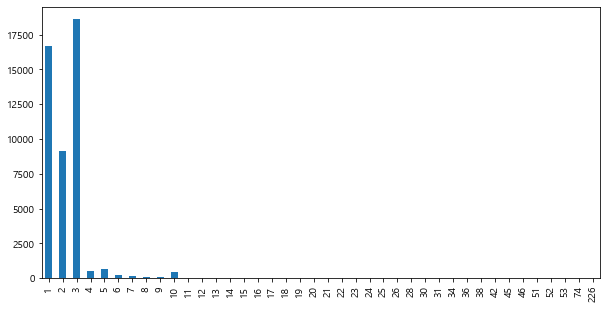

In [76]:
tmp['sub_id'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))

In [77]:
tmp[tmp['sub_id'] == 226]

,,,,sub_id
date,cpt_id,team_id,user_id,
2020-12-02,235678.0,46230.0,5281.0,226


In [78]:
info_user[info_user['id'] == 5281]

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
21270,5281,2020-11-30 9:25,1,0,0,82,1,1


In [79]:
info_compet[info_compet['cpt_id'] == 235678.0]

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show


- 대회 정보에 존재하지 않는 cpt_id => 아마 개발자분이 test 용으로 만든 대회의 제출 횟수로 추정됨

In [80]:
# info_sub의 cpt_id가 info_compet의 cpt_id에 존재하지 않는 대회 list up
not_exist_cpt_id = []
for id in info_sub['cpt_id'].unique():
    if id not in info_compet['cpt_id'].unique():
        not_exist_cpt_id.append(id)
        print(id)

235536.0
235516.0
235537.0
235508.0
235533.0
235541.0
235534.0
235538.0
235540.0
235539.0
235506.0
235497.0
235501.0
235500.0
235548.0
235549.0
235560.0
235576.0
235588.0
235586.0
235589.0
235593.0
235594.0
235596.0
235597.0
235610.0
235605.0
235611.0
235604.0
235603.0
235602.0
235601.0
235599.0
235623.0
235627.0
235639.0
235628.0
235638.0
235643.0
235651.0
235652.0
235654.0
235669.0
235666.0
235664.0
235677.0
235675.0
196884.0
235678.0
235681.0
235689.0
235692.0


In [81]:
len(not_exist_cpt_id)

52

In [82]:
info_sub.shape

(110272, 6)

In [83]:
# 해당 대회의 제출 기록들 모두 삭제
for id in not_exist_cpt_id:
    idx = info_sub[info_sub['cpt_id'] == id].index
    info_sub.drop(idx, inplace=True)

In [84]:
info_sub.shape

(94334, 6)

In [85]:
110272 - 94334    # 15,938개 삭제됨

15938

In [86]:
info_sub.reset_index(inplace=True)
info_sub.drop('index', axis=1, inplace=True)
info_sub

,sub_id,cpt_id,team_id,user_id,c_time,date
0,-250918.0,229255.0,5019.0,23529.0,2019-11-24 20:40,2019-11-24
1,-250904.0,229611.0,5162.0,16668.0,2019-11-24 20:36,2019-11-24
2,-250881.0,235401.0,5042.0,7048.0,2019-11-24 20:24,2019-11-24
3,-250873.0,235401.0,5024.0,6540.0,2019-11-24 20:23,2019-11-24
4,-250860.0,229255.0,4890.0,4364.0,2019-11-24 20:19,2019-11-24
...,...,...,...,...,...,...
94329,492341.0,235680.0,51134.0,9257.0,2021-01-08 23:51,2021-01-08
94330,492342.0,235680.0,51134.0,9257.0,2021-01-08 23:52,2021-01-08
94331,492343.0,235683.0,49964.0,8904.0,2021-01-08 23:53,2021-01-08
94332,492344.0,235680.0,51777.0,4901.0,2021-01-08 23:58,2021-01-08


# 데이터 저장

In [87]:
info_compet.to_csv('data/info_compet.csv', encoding='cp949', index=False)
info_user.to_csv('data/info_user.csv', encoding='cp949', index=False)
info_login.to_csv('data/info_login.csv', encoding='cp949', index=False)
info_sub.to_csv('data/info_sub.csv', encoding='cp949', index=False)